# Movie Recommendation System

Problem Statement: Create a score and show top 10 movies that have the highest scores. 

## Importing Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('movies_metadata.csv', low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Exploring Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df.shape


(45466, 24)

In [9]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


Has quite a lot of missing values. However, we will ignore them for the simple version of the recommender system.

## Univariate Analysis

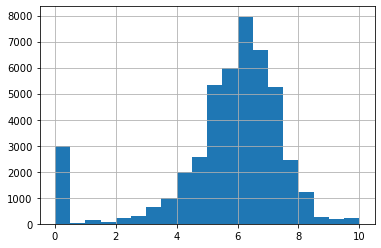

In [10]:
df["vote_average"].hist(bins=20)

Distribution is negatively skewed

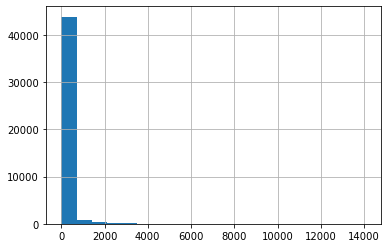

In [11]:
df["vote_count"].hist(bins=20)

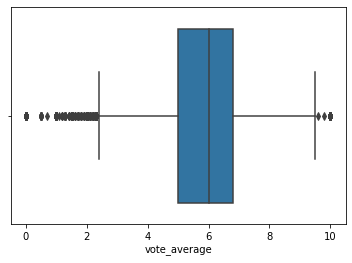

In [14]:
sns.boxplot(df["vote_average"])

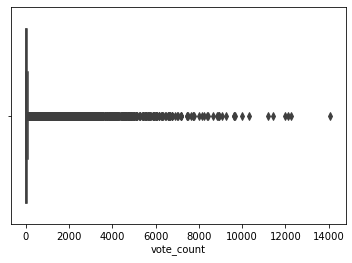

In [15]:
sns.boxplot(df["vote_count"])

There are plenty of outliers in our data. However, we will ignore them for this simple version of the recommendation system. 

# Building Recommender System

In [17]:
average = df['vote_average'].mean()
average

5.618207215133889

In [18]:
_90perc = df['vote_count'].quantile(0.9)
_90perc

160.0

### Filtering of the large dataset

In [42]:
df1 = df[(df['runtime']>150)&(df['revenue']>300000000)&(df['homepage'].notna())]

df1 is the filtered dataset of movies with runtime of more than 2.5 hours, revenue more that 300 million and have a homepage.

In [43]:
df1.shape

(27, 24)

In [44]:
df1 = df1[df1['vote_count']>=_90perc]
df1.shape

(27, 24)

### Function to calculate score of each movie (IMDB formula)

In [45]:
def score(x, m=_90perc, c=average):
    v = x['vote_count']
    r = x['vote_average']
    return (v/(v+m)*r)+(m/(m+v)*c)

In [46]:
df1['score'] = df1.apply(score,axis=1)

In [47]:
df1.sort_values('score',ascending=False, inplace=True)

In [34]:
df1[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
12481,The Dark Knight,12269.0,8.3,8.265477
522,Schindler's List,4436.0,8.3,8.206639
22879,Interstellar,11187.0,8.1,8.065005
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,8.052649
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.957900
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.951149
22131,The Wolf of Wall Street,6768.0,7.9,7.847303
13605,Inglourious Basterds,6598.0,7.9,7.845977
20051,Django Unchained,10297.0,7.8,7.766617
18252,The Dark Knight Rises,9263.0,7.6,7.566350


Text(0.5, 1.0, 'Most Voted Movies')

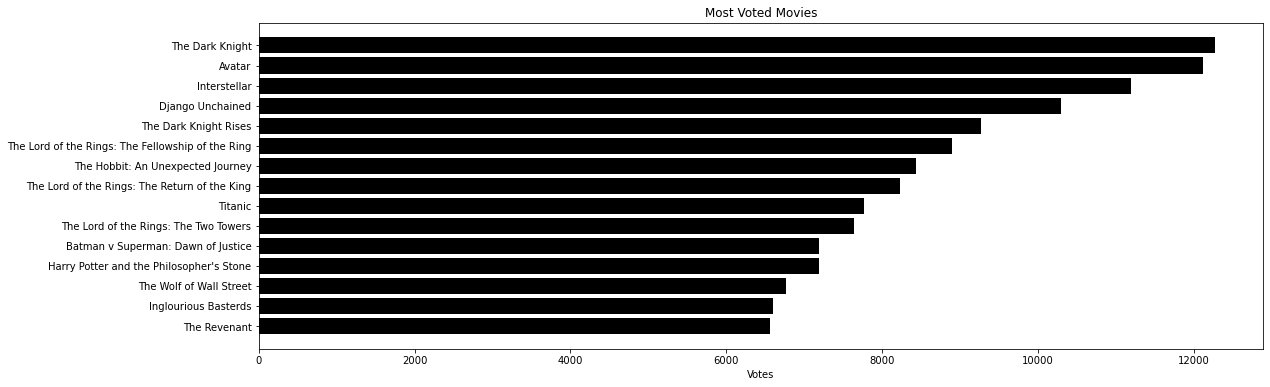

In [48]:
df2 = df1.sort_values('vote_count',ascending=False)
plt.figure(figsize=(18,6))

plt.barh(df2['title'].head(15),df2['vote_count'].head(15),align='center',color='black')
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("Most Voted Movies")